In [7]:
import numpy as np,os # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata, trim_mean
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def process(df,bigger_better=True):
    tmp = df.drop(columns=['pr_rec_score'],axis=1,level=2)  # matthews_corrcoef,pr_rec_score
    mat = tmp.droplevel(2,axis=1)
    rank = mat.copy()
    for d in mat.index:
        if bigger_better:
            rank.loc[d] = rankdata(1 - mat.loc[d])
        else:
            rank.loc[d] = rankdata(mat.loc[d])
    return rank, mat

In [9]:
Clean = pd.read_csv("Results/Clean.csv",header=[0,1,2],index_col=0)
Clean.shape

(32, 64)

In [10]:
Noisy = pd.read_csv("Results/Noisy.csv",header=[0,1,2],index_col=0)
Noisy.shape

(32, 64)

In [11]:
rank_clean,clean = process(Clean,bigger_better=True)
rank_noisy,noisy = process(Noisy,bigger_better=True)
noisy.shape,clean.shape

((32, 32), (32, 32))

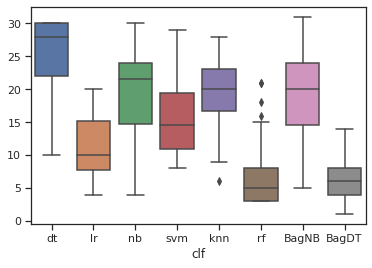

In [12]:
df = rank_clean
sns.boxplot(data=df.median(level=1,axis=1));

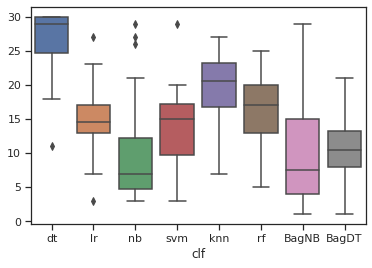

In [13]:
df = rank_noisy
sns.boxplot(data=df.median(level=1,axis=1));

In [14]:
N = noisy.median(level=1,axis=1).assign(State='Noisy')
C = clean.median(level=1,axis=1).assign(State='Clean')

In [15]:
comb = pd.concat([pd.melt(C,id_vars='State'),pd.melt(N,id_vars='State')],axis=0)
comb.shape,comb.columns

((512, 3), Index(['State', 'clf', 'value'], dtype='object'))

In [16]:
comb.columns = ['State', 'Classifier', 'MCC']

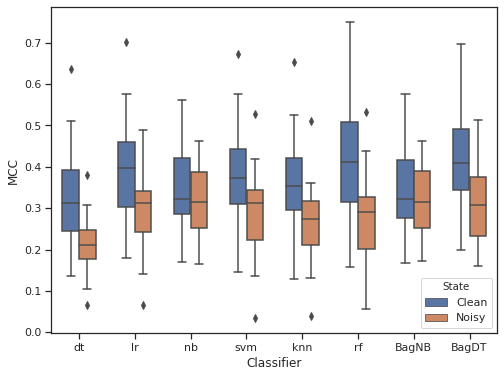

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Classifier',y='MCC',data=comb,hue='State',width=.6);

In [18]:
cols = ['Clean','Noisy','p-value','Effect','Interpretation']
df = pd.DataFrame(columns=cols,index=N.columns)

In [21]:
for c in N.drop(columns='State').columns:
    print(c)
    df.loc[c,'Clean'] = trim_mean(C[c],.05)
    df.loc[c,'Noisy'] = trim_mean(N[c],.05)
    df.loc[c,'p-value'] = wilcoxon(C[c],N[c]).pvalue
    df.loc[c,'Effect'] = pg.effsize.compute_effsize(C[c],N[c],eftype='hedges',paired=True)
    df.loc[c,'Interpretation'] = 0
    print(df.loc[c],'\n')

dt
Clean                0.320679
Noisy                0.206592
p-value           8.75128e-07
Effect                1.31207
Interpretation              0
Name: dt, dtype: object 

lr
Clean                0.387174
Noisy                0.287598
p-value           1.16368e-06
Effect                1.00349
Interpretation              0
Name: lr, dtype: object 

nb
Clean                0.343451
Noisy                0.320586
p-value           0.000213578
Effect               0.276915
Interpretation              0
Name: nb, dtype: object 

svm
Clean                0.372026
Noisy                 0.29292
p-value           3.86267e-06
Effect               0.755006
Interpretation              0
Name: svm, dtype: object 

knn
Clean                0.358437
Noisy                 0.26133
p-value           2.03889e-06
Effect                1.00074
Interpretation              0
Name: knn, dtype: object 

rf
Clean                 0.41816
Noisy                0.276668
p-value           7.95288e-07
Effect  